In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from turtle import color
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv("PrivateRoomMex.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8608 entries, 0 to 8607
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8608 non-null   int64  
 1   room_type                  8608 non-null   object 
 2   price                      8608 non-null   float64
 3   host_is_superhost          8608 non-null   float64
 4   host_acceptance_rate       8608 non-null   float64
 5   bathrooms                  8608 non-null   float64
 6   review_scores_cleanliness  8608 non-null   float64
 7   host_identity_verified     8608 non-null   float64
 8   instant_bookable           8608 non-null   float64
 9   property_type              8608 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 672.6+ KB


In [3]:
data = data.copy()
data_2 = data.copy()
data_3= data.copy()
data_4 = data.copy()
data_5 = data.copy()
data_6 = data.copy()
data_7 = data.copy()

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

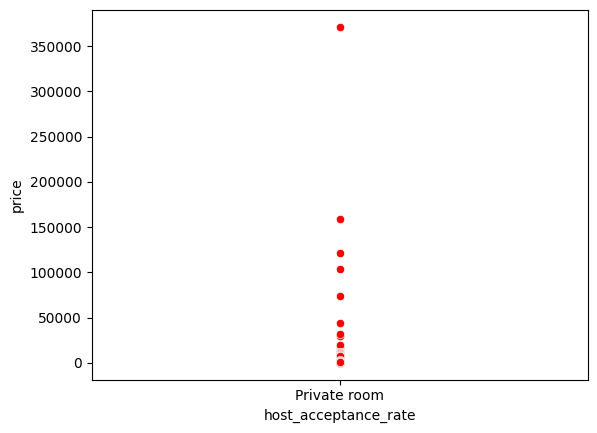

In [4]:
#imprimimos el scarlert plot entre la variable dependiente (total) e independiente (alcohol)
#Dependiente es la que se quiere predecir y la independiente es aquella que puede aportar información para hacer un análisis 


sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data)


In [5]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data[['host_acceptance_rate']]
Var_Dep = data['price']


In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [7]:
type(model)

sklearn.linear_model._base.LinearRegression

In [8]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [9]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([4.30640249]),
 'rank_': 1,
 'singular_': array([2595.59115594]),
 'intercept_': 663.5917150993373}

In [10]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.000605654477641715

In [11]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([1089.92556145,  986.57190173, 1094.23196394, ..., 1038.24873159,
       1094.23196394, 1094.23196394])

In [12]:
#Se inserta la columna "Predicciones" al dataframe
data.insert(0, 'Predicciones',y_pred)
data

Predicciones  Unnamed: 0     room_type   price  host_is_superhost  \
0      1089.925561           4  Private room  1114.0                0.0   
1       986.571902           6  Private room   340.0                1.0   
2      1094.231964          10  Private room   550.0                0.0   
3      1094.231964          12  Private room  1007.0                0.0   
4      1089.925561          13  Private room   310.0                0.0   
...            ...         ...           ...     ...                ...   
8603    827.235010       26253  Private room   381.0                0.0   
8604   1094.231964       26266  Private room   264.0                0.0   
8605   1038.248732       26268  Private room   360.0                0.0   
8606   1094.231964       26272  Private room   943.0                0.0   
8607   1094.231964       26276  Private room   760.0                0.0   

      host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                     99.0        1.0                       4.80   
1                     75.0        1.0                       4.61   
2                    100.0        1.0                       4.60   
3                    100.0        1.0                       4.66   
4                     99.0        1.0                       4.79   
...                    ...        ...                        ...   
8603                  38.0        1.0                       4.80   
8604                 100.0        1.0                       4.80   
8605                  87.0        1.0                       4.80   
8606                 100.0        1.0                       4.80   
8607                 100.0        1.0                       4.80   

      host_identity_verified  instant_bookable                property_type  
0                        0.0               0.0                 Private room  
1                        1.0               0.0  Private room in rental unit  
2                        1.0               0.0  Private room in guest suite  
3                        1.0               0.0  Private room in rental unit  
4                        1.0               0.0  Private room in rental unit  
...                      ...               ...                          ...  
8603                     1.0               0.0   Private room in guesthouse  
8604                     1.0               1.0  Private room in rental unit  
8605                     1.0               0.0  Private room in rental unit  
8606                     1.0               1.0                Room in hotel  
8607                     1.0               1.0                Room in hotel  

[8608 rows x 11 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

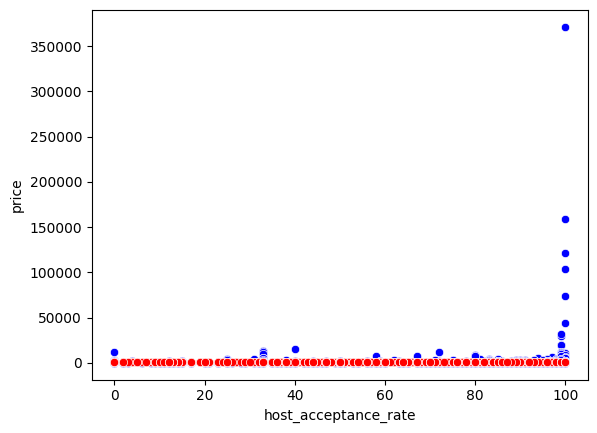

In [13]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=data)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [14]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.000605654477641715

In [15]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.024610048306366955

In [16]:
#Eliminamos columna de tipo string
data1=data.drop(data.select_dtypes(include=['object']).columns, axis=1)


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

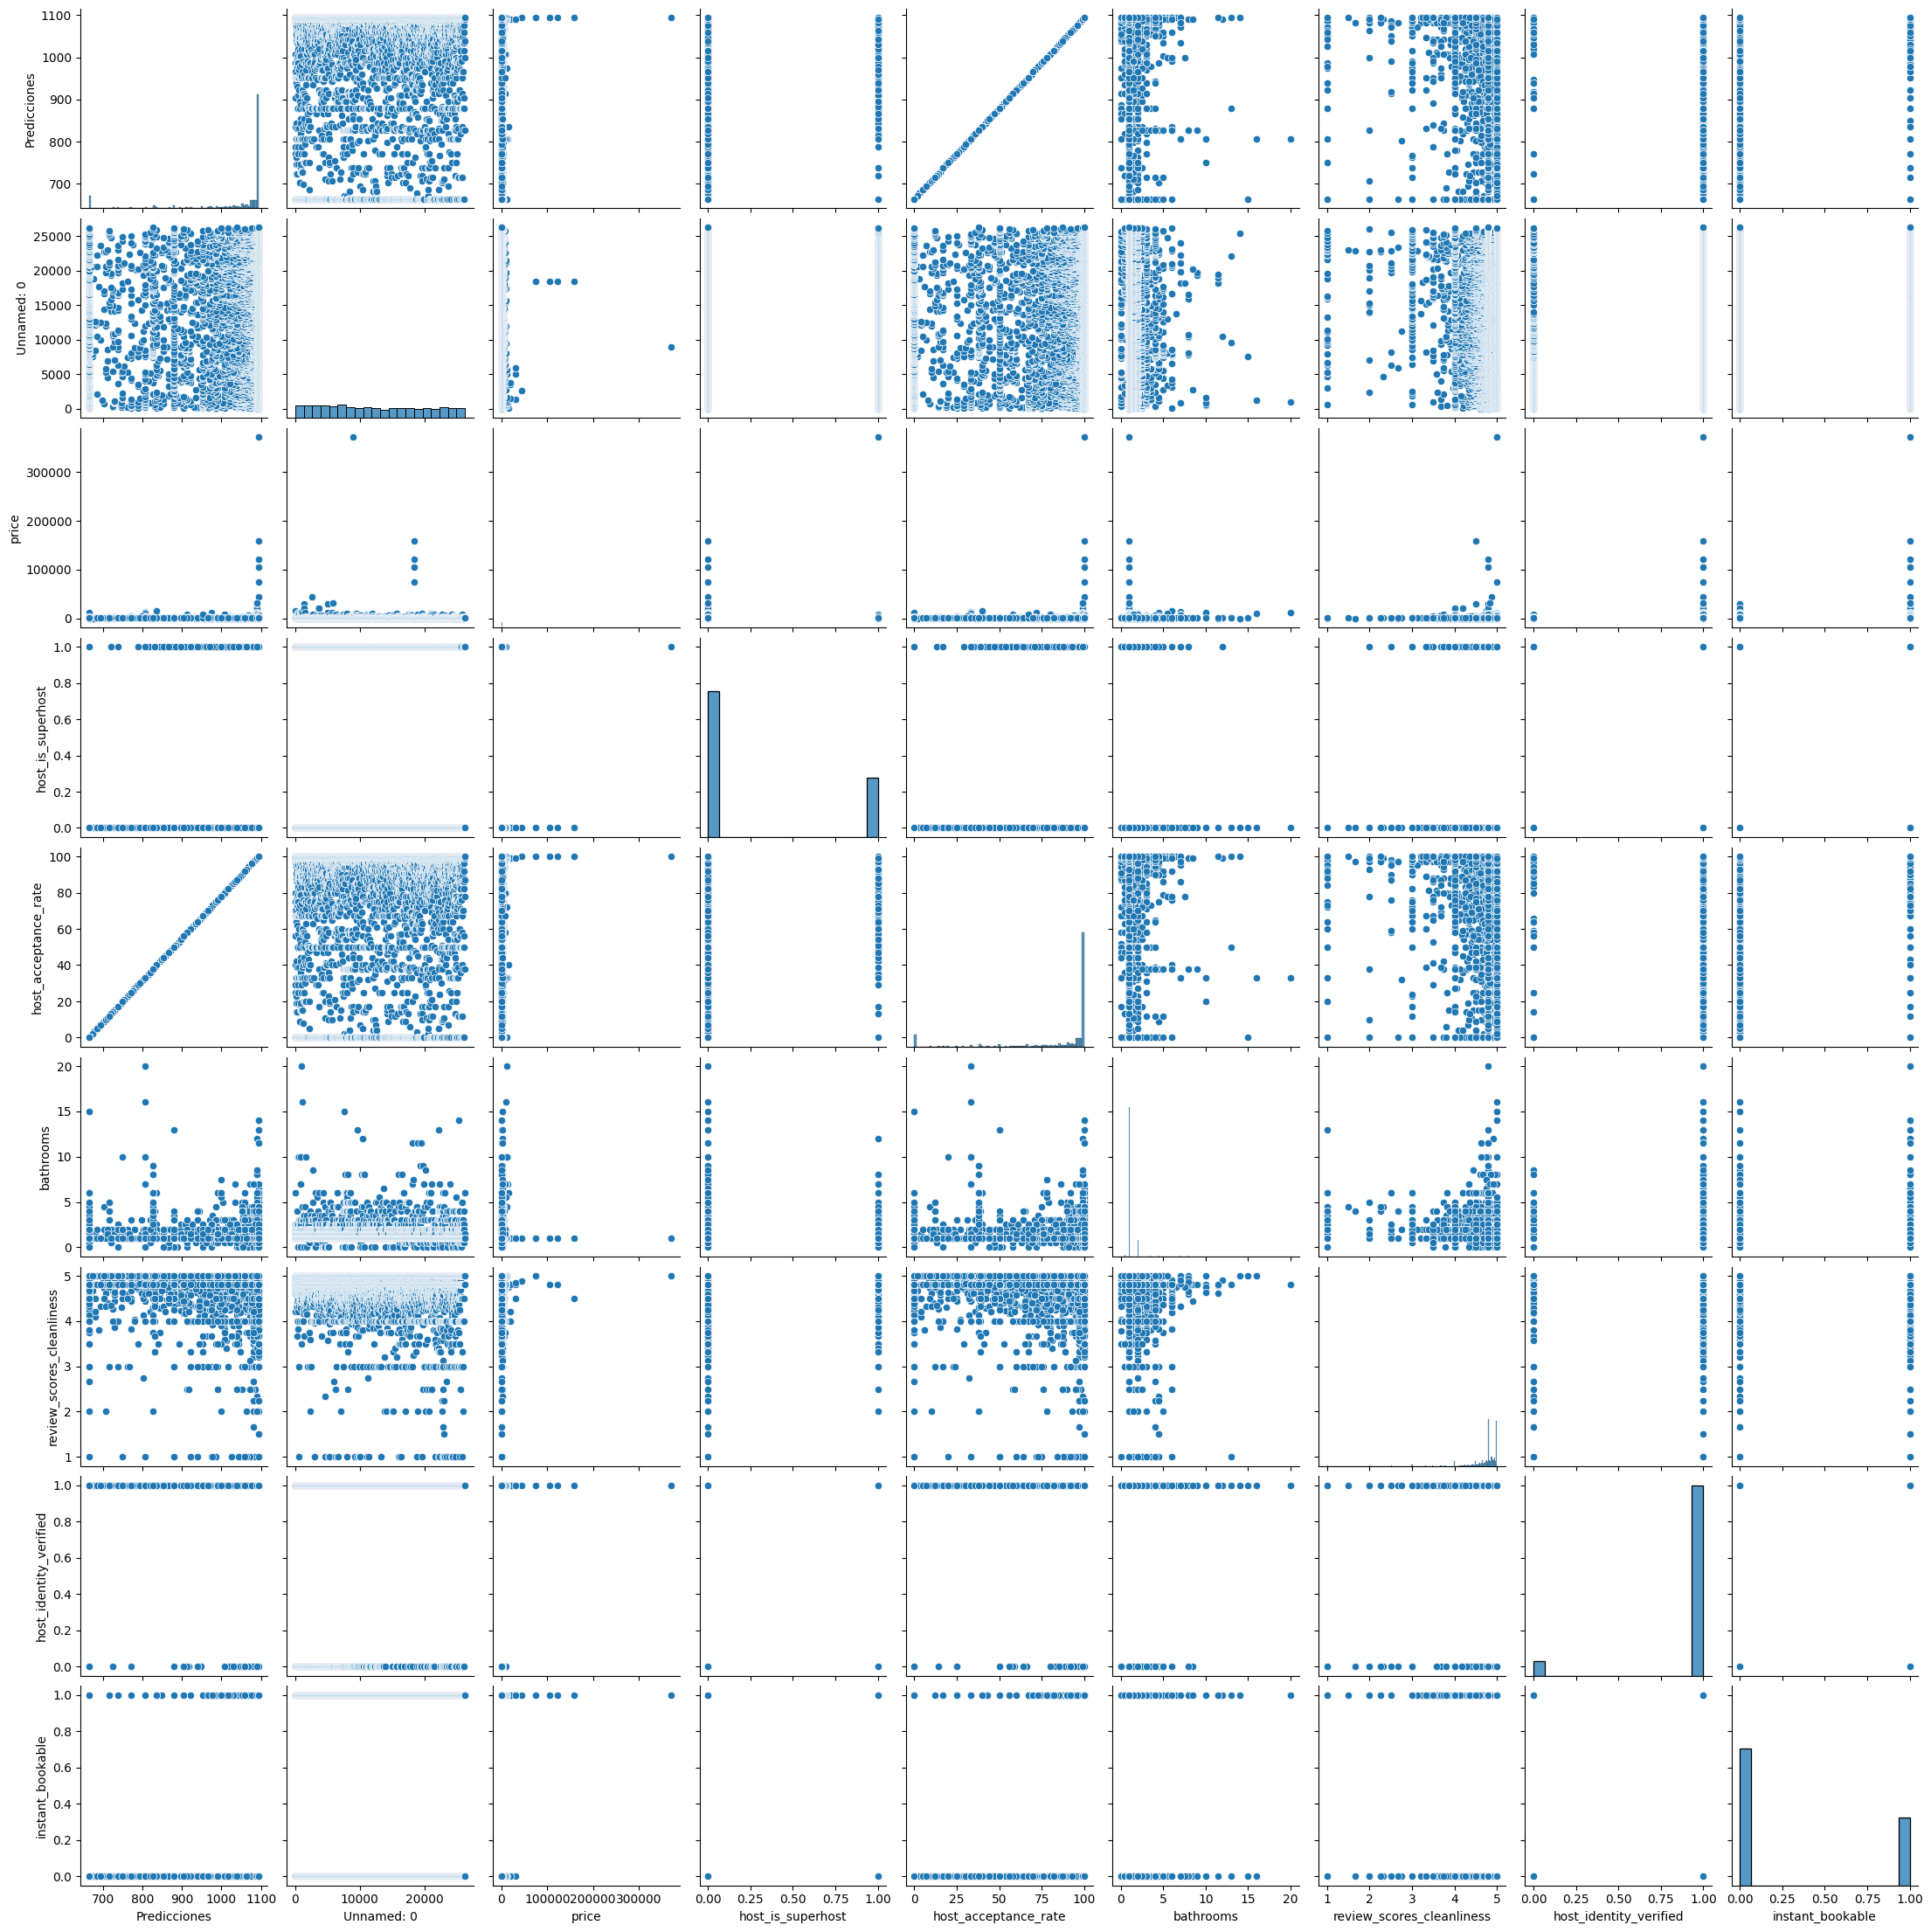

In [17]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data1)

In [18]:
#Correlaci9ones entre variables
Corr_Factors=data1.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.017685  0.024610   
Unnamed: 0                     0.017685    1.000000 -0.004553   
price                          0.024610   -0.004553  1.000000   
host_is_superhost              0.215731    0.017666 -0.010176   
host_acceptance_rate           1.000000    0.017685  0.024610   
bathrooms                     -0.054411   -0.005837  0.010982   
review_scores_cleanliness      0.023832   -0.079163  0.016465   
host_identity_verified        -0.110183    0.192970 -0.002690   
instant_bookable               0.305275    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.215731              1.000000  -0.054411   
Unnamed: 0                          0.017666              0.017685  -0.005837   
price                              -0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731  -0.080963   
host_acceptance_rate                0.215731              1.000000  -0.054411   
bathrooms                          -0.080963             -0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832  -0.119123   
host_identity_verified              0.160355             -0.110183  -0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.023832               -0.110183   
Unnamed: 0                                 -0.079163                0.192970   
price                                       0.016465               -0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832               -0.110183   
bathrooms                                  -0.119123               -0.046943   
review_scores_cleanliness                   1.000000               -0.011849   
host_identity_verified                     -0.011849                1.000000   
instant_bookable                           -0.074767                0.160096   

                           instant_bookable  
Predicciones                       0.305275  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness         -0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

In [19]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.017685  0.024610   
Unnamed: 0                     0.017685    1.000000  0.004553   
price                          0.024610    0.004553  1.000000   
host_is_superhost              0.215731    0.017666  0.010176   
host_acceptance_rate           1.000000    0.017685  0.024610   
bathrooms                      0.054411    0.005837  0.010982   
review_scores_cleanliness      0.023832    0.079163  0.016465   
host_identity_verified         0.110183    0.192970  0.002690   
instant_bookable               0.305275    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.215731              1.000000   0.054411   
Unnamed: 0                          0.017666              0.017685   0.005837   
price                               0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731   0.080963   
host_acceptance_rate                0.215731              1.000000   0.054411   
bathrooms                           0.080963              0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832   0.119123   
host_identity_verified              0.160355              0.110183   0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.023832                0.110183   
Unnamed: 0                                  0.079163                0.192970   
price                                       0.016465                0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832                0.110183   
bathrooms                                   0.119123                0.046943   
review_scores_cleanliness                   1.000000                0.011849   
host_identity_verified                      0.011849                1.000000   
instant_bookable                            0.074767                0.160096   

                           instant_bookable  
Predicciones                       0.305275  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness          0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

<Axes: >

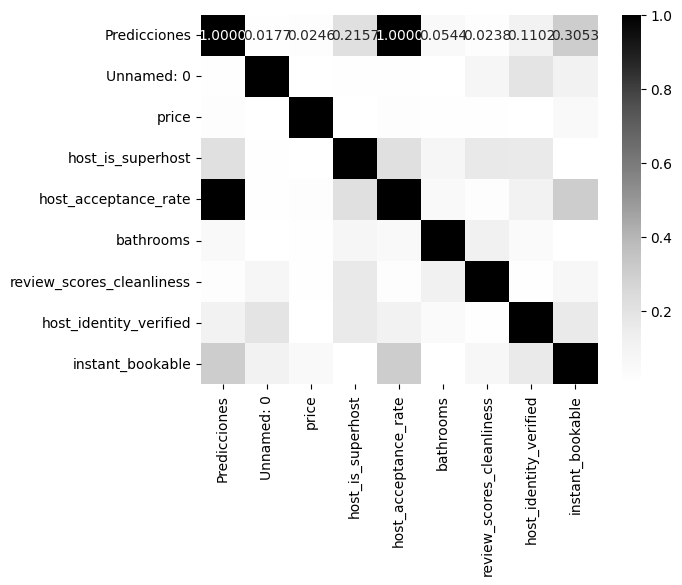

In [20]:
sns.heatmap(Corr_Factors1, cmap = "Grays", annot = True, fmt = ".4f")

**REGRESIÓN PRICE VS HOST_IS_SUPERHOST**

<Axes: xlabel='host_is_superhost', ylabel='price'>

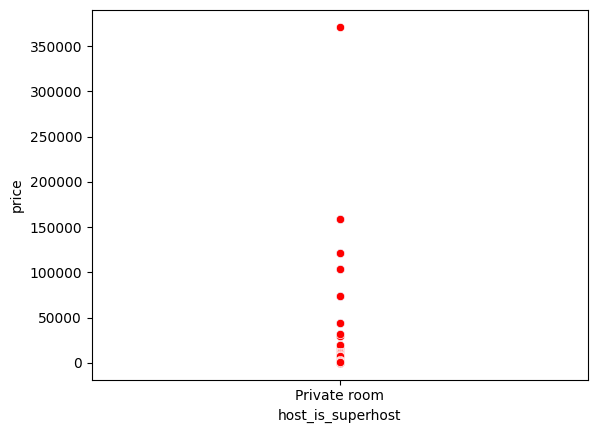

In [21]:
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=data_2)
sns.scatterplot(x='room_type', y='price', color='red', data=data_2)

In [22]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_2[['host_is_superhost']]
Var_Dep = data_2['price']

In [23]:
model=LinearRegression()

In [24]:
#verificamos la función relacoanda al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [25]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [26]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-109.96161266]),
 'rank_': 1,
 'singular_': array([42.03298929]),
 'intercept_': 1062.420734693878}

**modelo matemático**

In [27]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.00010355853084242916

In [28]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([1062.42073469,  952.45912203, 1062.42073469, ..., 1062.42073469,
       1062.42073469, 1062.42073469])

In [29]:
#Se inserta la columna "Predicciones" al dataframe
data_2.insert(0, 'Predicciones',y_pred)
data_2

Predicciones  Unnamed: 0     room_type   price  host_is_superhost  \
0      1062.420735           4  Private room  1114.0                0.0   
1       952.459122           6  Private room   340.0                1.0   
2      1062.420735          10  Private room   550.0                0.0   
3      1062.420735          12  Private room  1007.0                0.0   
4      1062.420735          13  Private room   310.0                0.0   
...            ...         ...           ...     ...                ...   
8603   1062.420735       26253  Private room   381.0                0.0   
8604   1062.420735       26266  Private room   264.0                0.0   
8605   1062.420735       26268  Private room   360.0                0.0   
8606   1062.420735       26272  Private room   943.0                0.0   
8607   1062.420735       26276  Private room   760.0                0.0   

      host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                     99.0        1.0                       4.80   
1                     75.0        1.0                       4.61   
2                    100.0        1.0                       4.60   
3                    100.0        1.0                       4.66   
4                     99.0        1.0                       4.79   
...                    ...        ...                        ...   
8603                  38.0        1.0                       4.80   
8604                 100.0        1.0                       4.80   
8605                  87.0        1.0                       4.80   
8606                 100.0        1.0                       4.80   
8607                 100.0        1.0                       4.80   

      host_identity_verified  instant_bookable                property_type  
0                        0.0               0.0                 Private room  
1                        1.0               0.0  Private room in rental unit  
2                        1.0               0.0  Private room in guest suite  
3                        1.0               0.0  Private room in rental unit  
4                        1.0               0.0  Private room in rental unit  
...                      ...               ...                          ...  
8603                     1.0               0.0   Private room in guesthouse  
8604                     1.0               1.0  Private room in rental unit  
8605                     1.0               0.0  Private room in rental unit  
8606                     1.0               1.0                Room in hotel  
8607                     1.0               1.0                Room in hotel  

[8608 rows x 11 columns]

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_is_superhost', ylabel='price'>

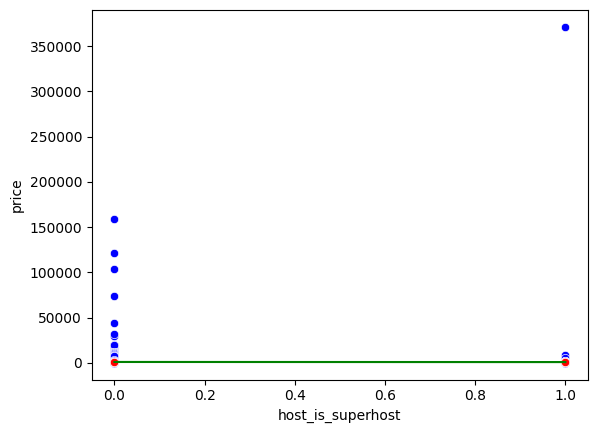

In [30]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=data_2)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=data_2)
sns.lineplot(x='host_is_superhost', y='Predicciones', color="green", data=data_2)

In [31]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00010355853084242916

In [32]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.010176371202075382

In [33]:
#Eliminamos columna de tipo string
data2=data_2.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

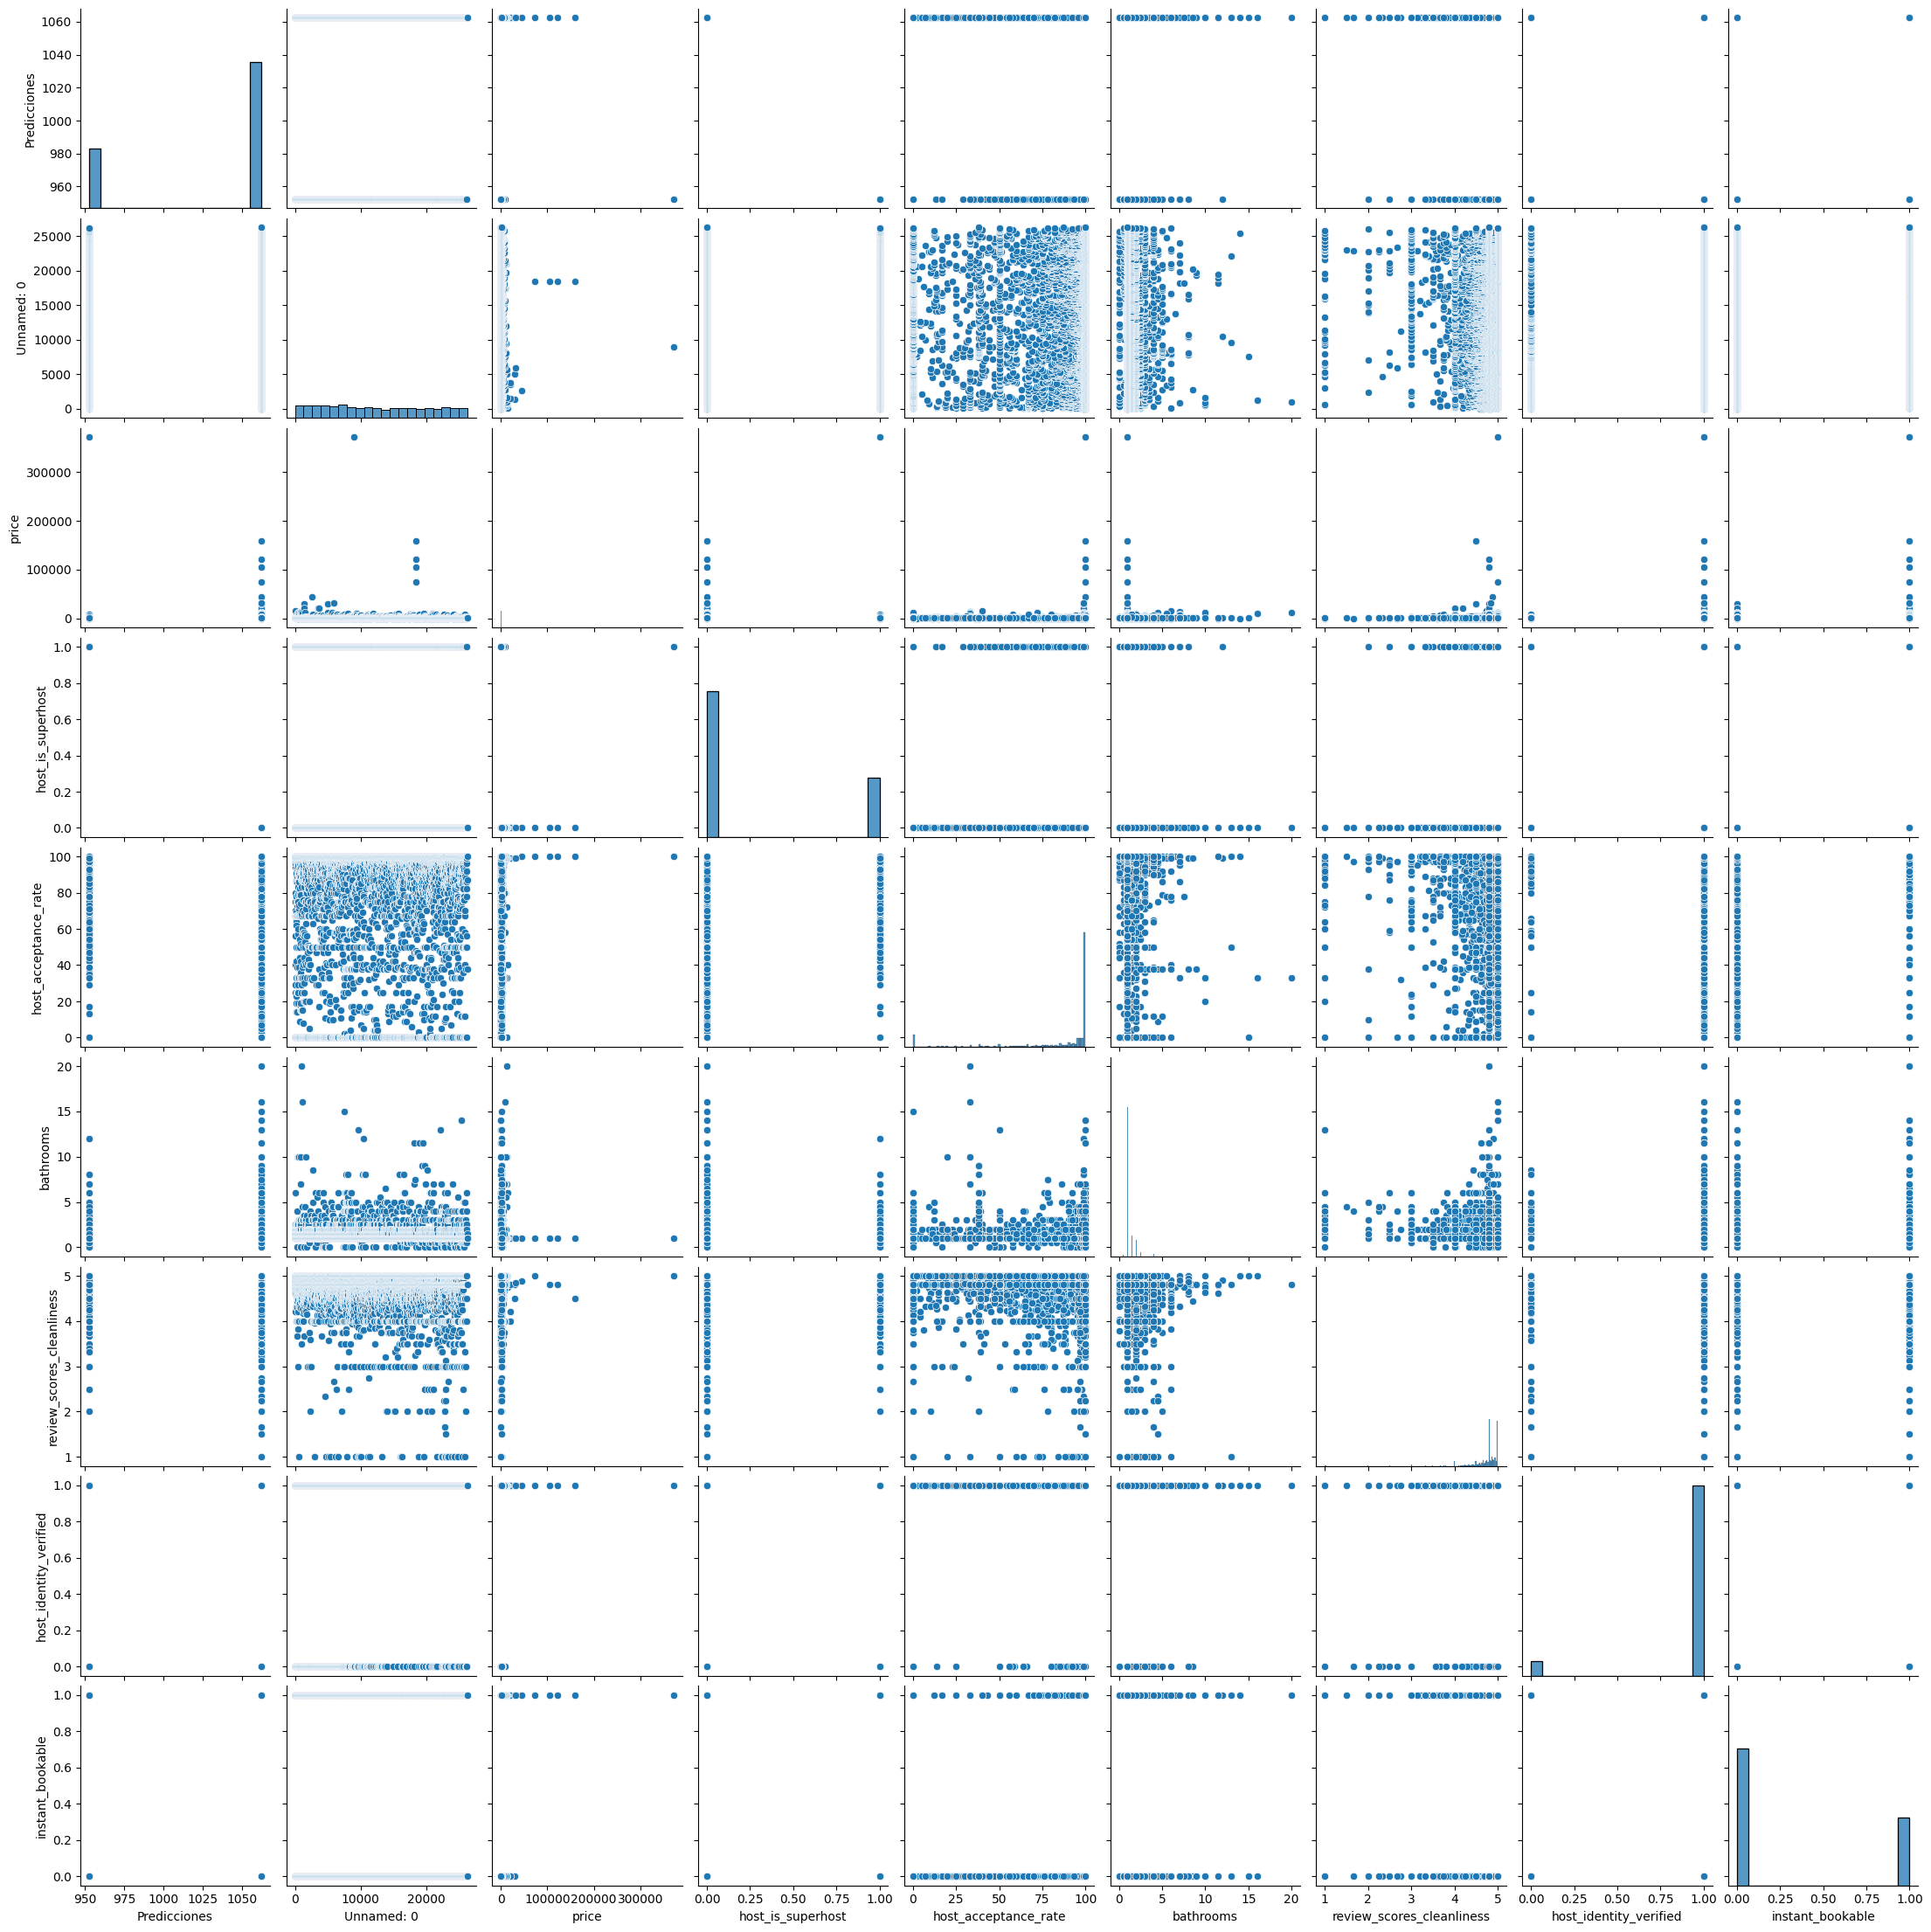

In [34]:
sns.pairplot(data2)

In [35]:
#Correlaci9ones entre variables
Corr_Factors=data2.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000   -0.017666  0.010176   
Unnamed: 0                    -0.017666    1.000000 -0.004553   
price                          0.010176   -0.004553  1.000000   
host_is_superhost             -1.000000    0.017666 -0.010176   
host_acceptance_rate          -0.215731    0.017685  0.024610   
bathrooms                      0.080963   -0.005837  0.010982   
review_scores_cleanliness     -0.168298   -0.079163  0.016465   
host_identity_verified        -0.160355    0.192970 -0.002690   
instant_bookable              -0.004868    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                       -1.000000             -0.215731   0.080963   
Unnamed: 0                          0.017666              0.017685  -0.005837   
price                              -0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731  -0.080963   
host_acceptance_rate                0.215731              1.000000  -0.054411   
bathrooms                          -0.080963             -0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832  -0.119123   
host_identity_verified              0.160355             -0.110183  -0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                               -0.168298               -0.160355   
Unnamed: 0                                 -0.079163                0.192970   
price                                       0.016465               -0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832               -0.110183   
bathrooms                                  -0.119123               -0.046943   
review_scores_cleanliness                   1.000000               -0.011849   
host_identity_verified                     -0.011849                1.000000   
instant_bookable                           -0.074767                0.160096   

                           instant_bookable  
Predicciones                      -0.004868  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness         -0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

In [36]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.017666  0.010176   
Unnamed: 0                     0.017666    1.000000  0.004553   
price                          0.010176    0.004553  1.000000   
host_is_superhost              1.000000    0.017666  0.010176   
host_acceptance_rate           0.215731    0.017685  0.024610   
bathrooms                      0.080963    0.005837  0.010982   
review_scores_cleanliness      0.168298    0.079163  0.016465   
host_identity_verified         0.160355    0.192970  0.002690   
instant_bookable               0.004868    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        1.000000              0.215731   0.080963   
Unnamed: 0                          0.017666              0.017685   0.005837   
price                               0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731   0.080963   
host_acceptance_rate                0.215731              1.000000   0.054411   
bathrooms                           0.080963              0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832   0.119123   
host_identity_verified              0.160355              0.110183   0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.168298                0.160355   
Unnamed: 0                                  0.079163                0.192970   
price                                       0.016465                0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832                0.110183   
bathrooms                                   0.119123                0.046943   
review_scores_cleanliness                   1.000000                0.011849   
host_identity_verified                      0.011849                1.000000   
instant_bookable                            0.074767                0.160096   

                           instant_bookable  
Predicciones                       0.004868  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness          0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

<Axes: >

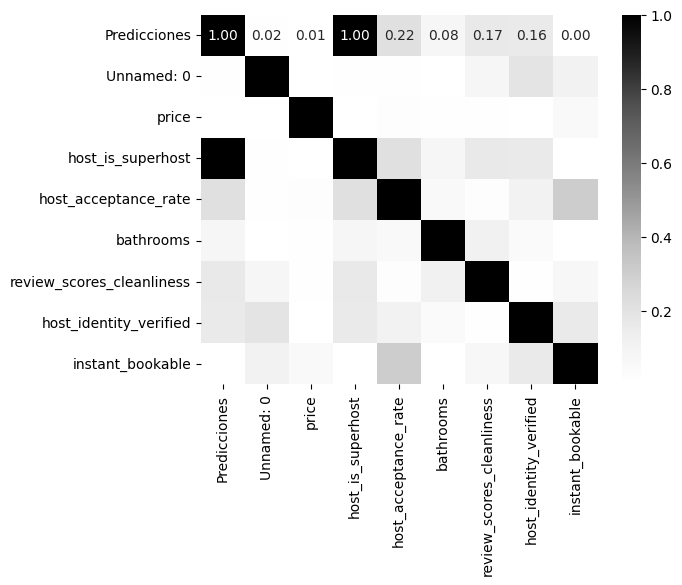

In [37]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs bathrooms**

<Axes: xlabel='bathrooms', ylabel='price'>

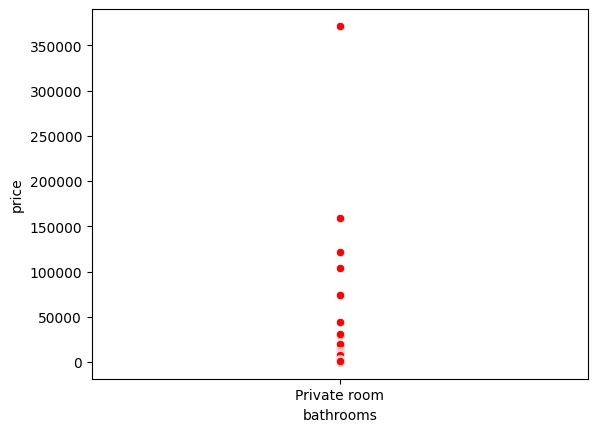

In [38]:
sns.scatterplot(x='bathrooms', y='price', color='blue', data=data_7)
sns.scatterplot(x='room_type', y='price', color='red', data=data_7)

In [39]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_7[['bathrooms']]
Var_Dep = data_7['price']

In [40]:
model=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [41]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [42]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [43]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([57.8665939]),
 'rank_': 1,
 'singular_': array([86.19434371]),
 'intercept_': 954.1370154219346}

In [44]:
# **modelo matematico**
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.00012059699878619323

In [45]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([1012.00360932, 1012.00360932, 1012.00360932, ..., 1012.00360932,
       1012.00360932, 1012.00360932])

In [46]:
#Se inserta la columna "Predicciones" al dataframe
data_7.insert(0, 'Predicciones',y_pred)
data_7

Predicciones  Unnamed: 0     room_type   price  host_is_superhost  \
0      1012.003609           4  Private room  1114.0                0.0   
1      1012.003609           6  Private room   340.0                1.0   
2      1012.003609          10  Private room   550.0                0.0   
3      1012.003609          12  Private room  1007.0                0.0   
4      1012.003609          13  Private room   310.0                0.0   
...            ...         ...           ...     ...                ...   
8603   1012.003609       26253  Private room   381.0                0.0   
8604   1012.003609       26266  Private room   264.0                0.0   
8605   1012.003609       26268  Private room   360.0                0.0   
8606   1012.003609       26272  Private room   943.0                0.0   
8607   1012.003609       26276  Private room   760.0                0.0   

      host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                     99.0        1.0                       4.80   
1                     75.0        1.0                       4.61   
2                    100.0        1.0                       4.60   
3                    100.0        1.0                       4.66   
4                     99.0        1.0                       4.79   
...                    ...        ...                        ...   
8603                  38.0        1.0                       4.80   
8604                 100.0        1.0                       4.80   
8605                  87.0        1.0                       4.80   
8606                 100.0        1.0                       4.80   
8607                 100.0        1.0                       4.80   

      host_identity_verified  instant_bookable                property_type  
0                        0.0               0.0                 Private room  
1                        1.0               0.0  Private room in rental unit  
2                        1.0               0.0  Private room in guest suite  
3                        1.0               0.0  Private room in rental unit  
4                        1.0               0.0  Private room in rental unit  
...                      ...               ...                          ...  
8603                     1.0               0.0   Private room in guesthouse  
8604                     1.0               1.0  Private room in rental unit  
8605                     1.0               0.0  Private room in rental unit  
8606                     1.0               1.0                Room in hotel  
8607                     1.0               1.0                Room in hotel  

[8608 rows x 11 columns]

In [47]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00012059699878619323

In [48]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.010981666484928106

In [49]:
#Eliminamos columna de tipo string
data7=data_7.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

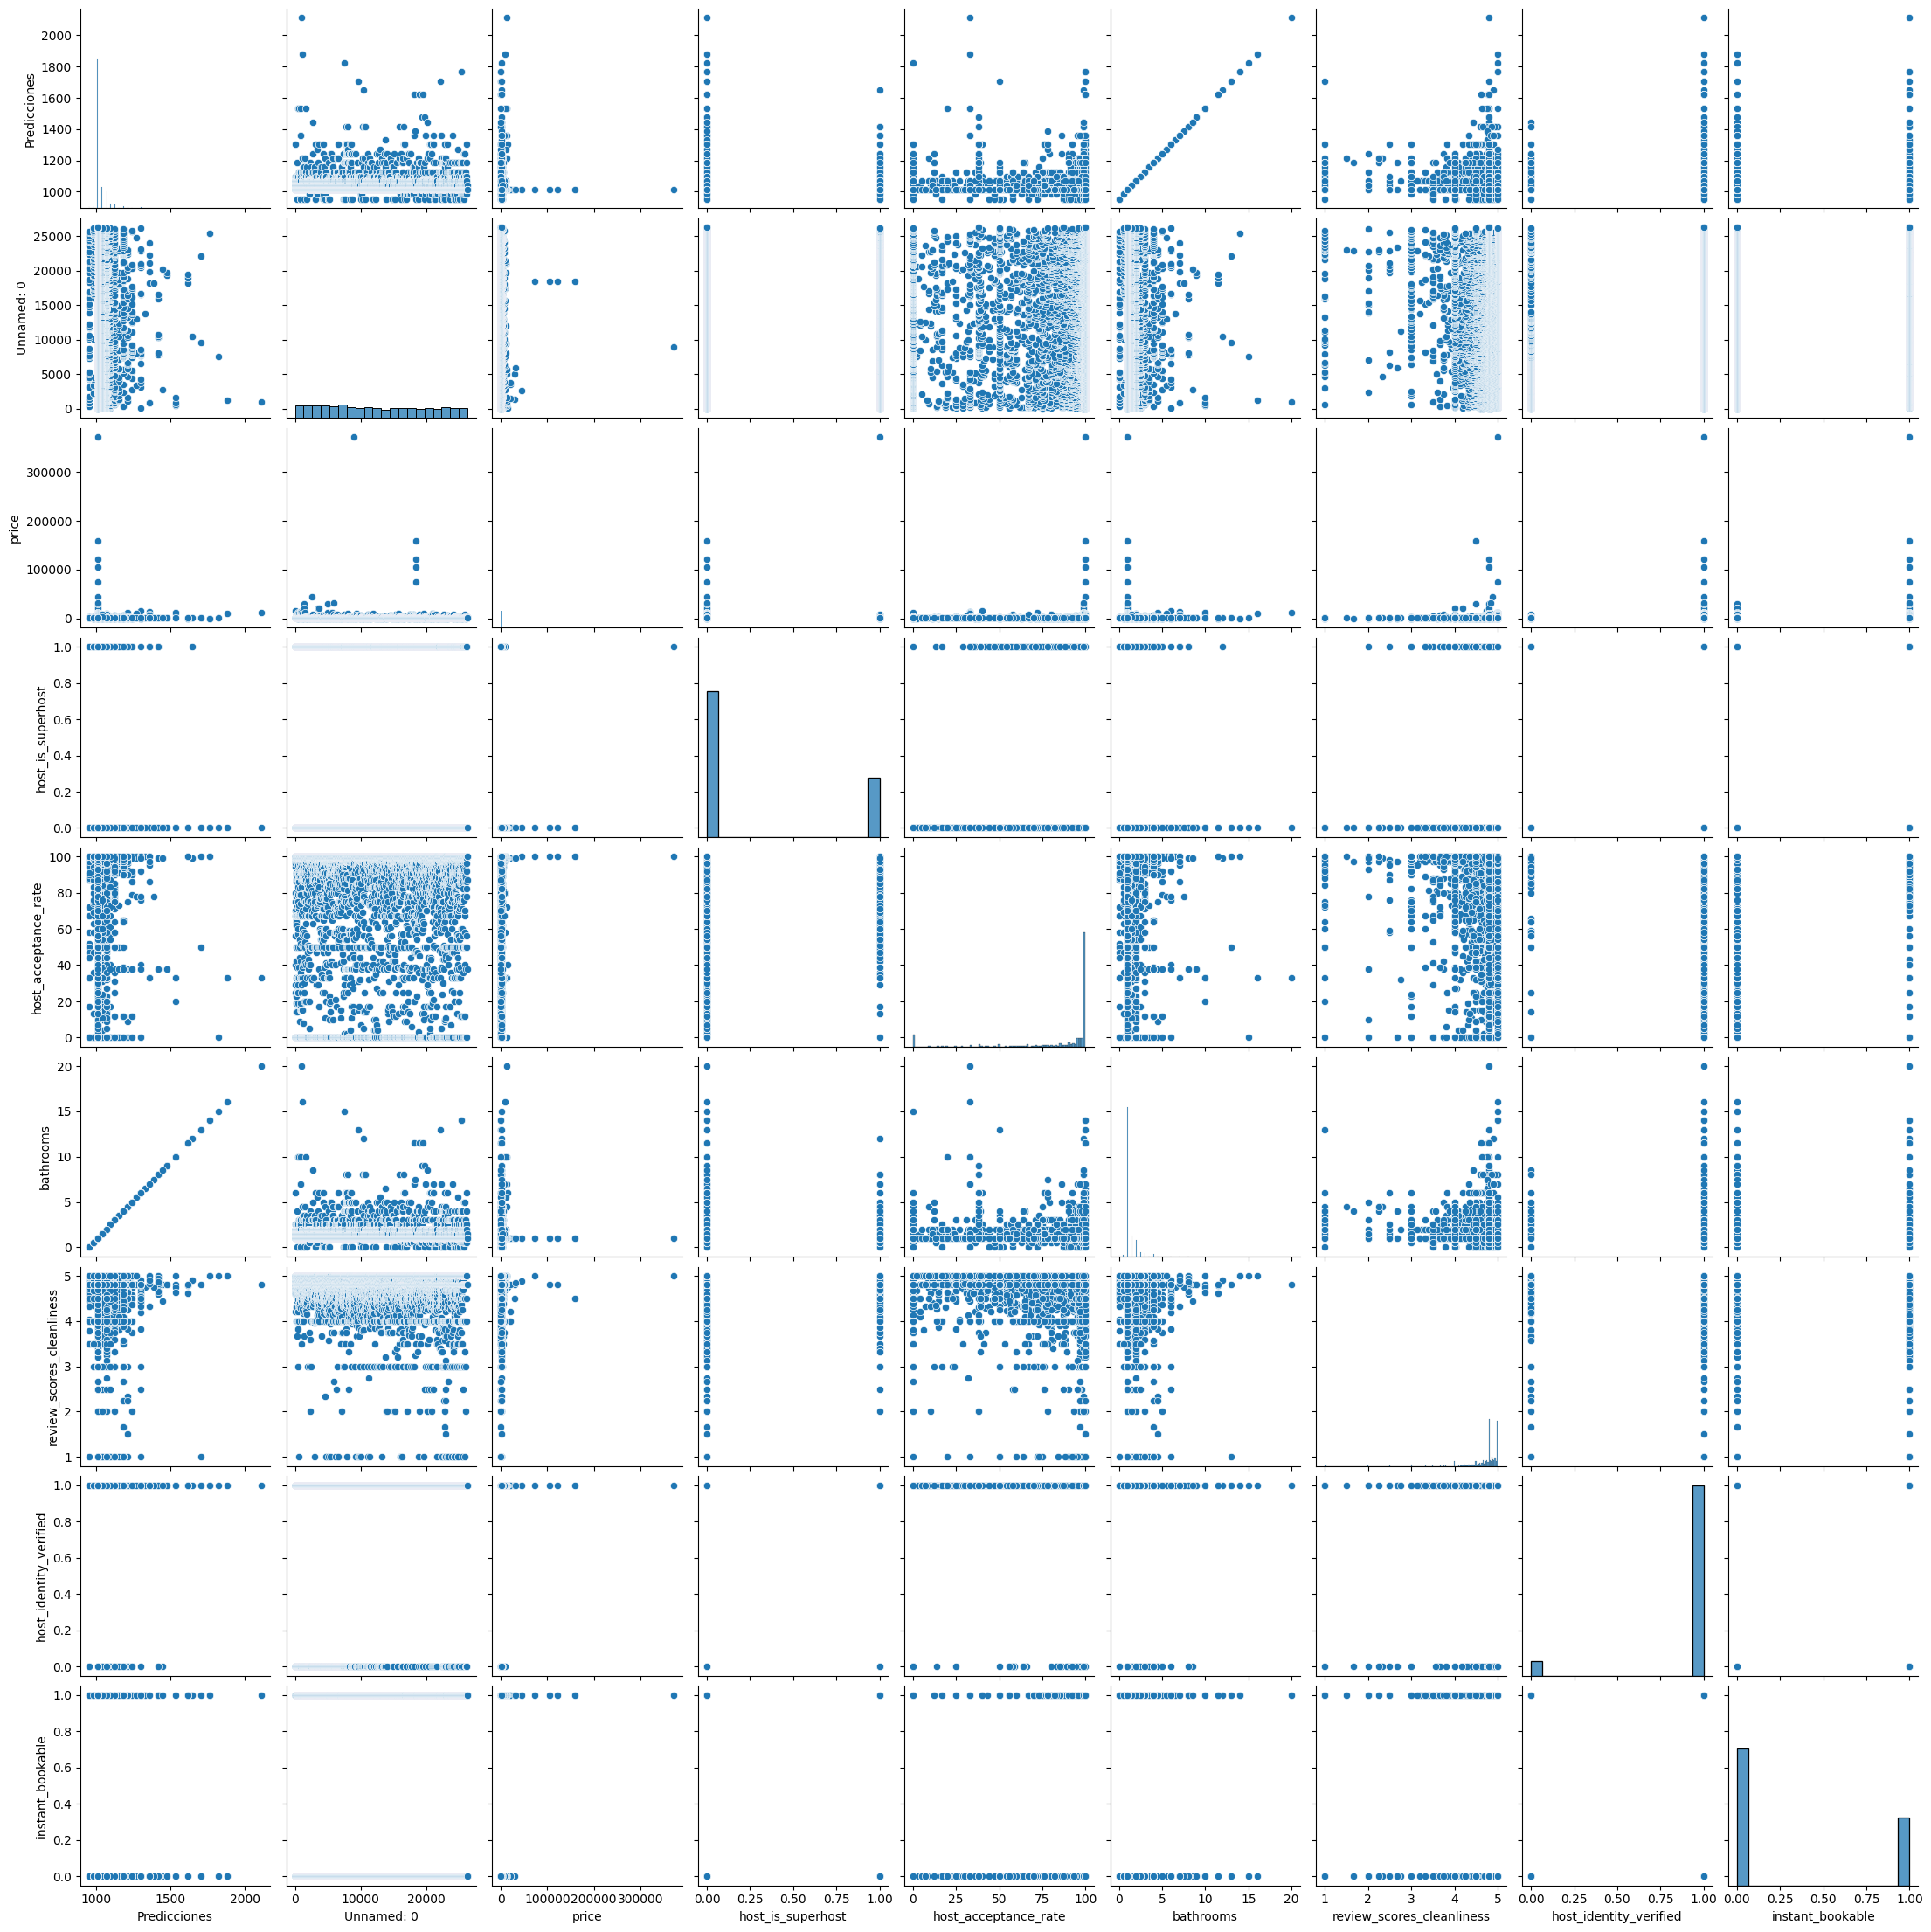

In [50]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data7)

In [51]:
#Correlaci9ones entre variables
Corr_Factors=data7.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000   -0.005837  0.010982   
Unnamed: 0                    -0.005837    1.000000 -0.004553   
price                          0.010982   -0.004553  1.000000   
host_is_superhost             -0.080963    0.017666 -0.010176   
host_acceptance_rate          -0.054411    0.017685  0.024610   
bathrooms                      1.000000   -0.005837  0.010982   
review_scores_cleanliness     -0.119123   -0.079163  0.016465   
host_identity_verified        -0.046943    0.192970 -0.002690   
instant_bookable               0.003016    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                       -0.080963             -0.054411   1.000000   
Unnamed: 0                          0.017666              0.017685  -0.005837   
price                              -0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731  -0.080963   
host_acceptance_rate                0.215731              1.000000  -0.054411   
bathrooms                          -0.080963             -0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832  -0.119123   
host_identity_verified              0.160355             -0.110183  -0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                               -0.119123               -0.046943   
Unnamed: 0                                 -0.079163                0.192970   
price                                       0.016465               -0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832               -0.110183   
bathrooms                                  -0.119123               -0.046943   
review_scores_cleanliness                   1.000000               -0.011849   
host_identity_verified                     -0.011849                1.000000   
instant_bookable                           -0.074767                0.160096   

                           instant_bookable  
Predicciones                       0.003016  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness         -0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

In [52]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.005837  0.010982   
Unnamed: 0                     0.005837    1.000000  0.004553   
price                          0.010982    0.004553  1.000000   
host_is_superhost              0.080963    0.017666  0.010176   
host_acceptance_rate           0.054411    0.017685  0.024610   
bathrooms                      1.000000    0.005837  0.010982   
review_scores_cleanliness      0.119123    0.079163  0.016465   
host_identity_verified         0.046943    0.192970  0.002690   
instant_bookable               0.003016    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.080963              0.054411   1.000000   
Unnamed: 0                          0.017666              0.017685   0.005837   
price                               0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731   0.080963   
host_acceptance_rate                0.215731              1.000000   0.054411   
bathrooms                           0.080963              0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832   0.119123   
host_identity_verified              0.160355              0.110183   0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.119123                0.046943   
Unnamed: 0                                  0.079163                0.192970   
price                                       0.016465                0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832                0.110183   
bathrooms                                   0.119123                0.046943   
review_scores_cleanliness                   1.000000                0.011849   
host_identity_verified                      0.011849                1.000000   
instant_bookable                            0.074767                0.160096   

                           instant_bookable  
Predicciones                       0.003016  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness          0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

<Axes: >

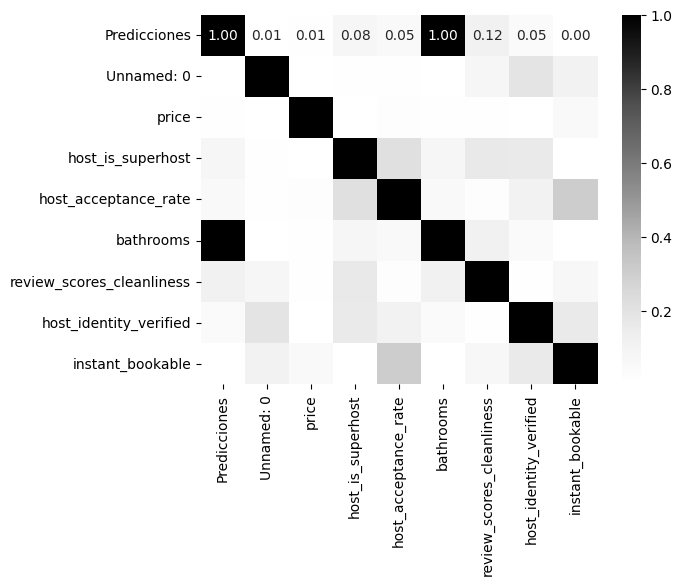

In [53]:

#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

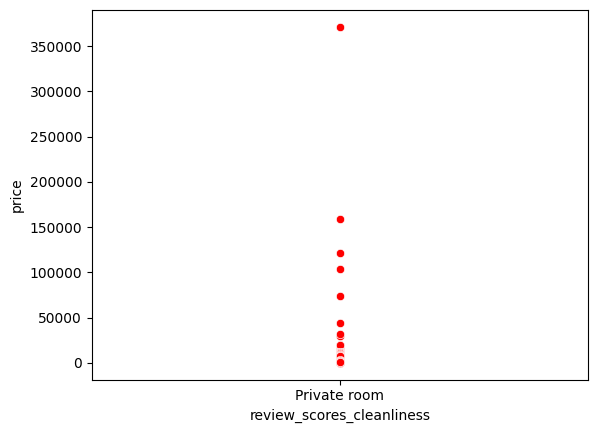

In [54]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data_3)

In [55]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['review_scores_cleanliness']]
Var_Dep = data_3['price']

In [56]:
model=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [57]:
type(model)

sklearn.linear_model._base.LinearRegression

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [59]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([192.79461493]),
 'rank_': 1,
 'singular_': array([38.78832618]),
 'intercept_': 118.68270560612666}

**modelo matemático**

In [60]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0002710909389276317

In [61]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([1044.09685727, 1007.46588044, 1005.53793429, ..., 1044.09685727,
       1044.09685727, 1044.09685727])

In [62]:
#Se inserta la columna "Predicciones" al dataframe
data_3.insert(0, 'Predicciones',y_pred)
data_3

Predicciones  Unnamed: 0     room_type   price  host_is_superhost  \
0      1044.096857           4  Private room  1114.0                0.0   
1      1007.465880           6  Private room   340.0                1.0   
2      1005.537934          10  Private room   550.0                0.0   
3      1017.105611          12  Private room  1007.0                0.0   
4      1042.168911          13  Private room   310.0                0.0   
...            ...         ...           ...     ...                ...   
8603   1044.096857       26253  Private room   381.0                0.0   
8604   1044.096857       26266  Private room   264.0                0.0   
8605   1044.096857       26268  Private room   360.0                0.0   
8606   1044.096857       26272  Private room   943.0                0.0   
8607   1044.096857       26276  Private room   760.0                0.0   

      host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                     99.0        1.0                       4.80   
1                     75.0        1.0                       4.61   
2                    100.0        1.0                       4.60   
3                    100.0        1.0                       4.66   
4                     99.0        1.0                       4.79   
...                    ...        ...                        ...   
8603                  38.0        1.0                       4.80   
8604                 100.0        1.0                       4.80   
8605                  87.0        1.0                       4.80   
8606                 100.0        1.0                       4.80   
8607                 100.0        1.0                       4.80   

      host_identity_verified  instant_bookable                property_type  
0                        0.0               0.0                 Private room  
1                        1.0               0.0  Private room in rental unit  
2                        1.0               0.0  Private room in guest suite  
3                        1.0               0.0  Private room in rental unit  
4                        1.0               0.0  Private room in rental unit  
...                      ...               ...                          ...  
8603                     1.0               0.0   Private room in guesthouse  
8604                     1.0               1.0  Private room in rental unit  
8605                     1.0               0.0  Private room in rental unit  
8606                     1.0               1.0                Room in hotel  
8607                     1.0               1.0                Room in hotel  

[8608 rows x 11 columns]

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

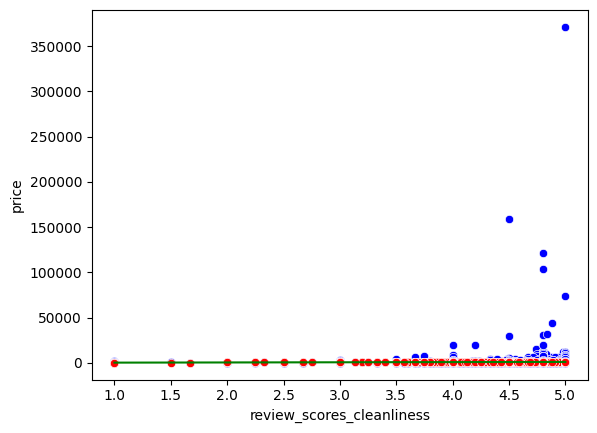

In [63]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=data_3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=data_3)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=data_3)

In [64]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0002710909389276317

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.016464839474699768

In [66]:
#Eliminamos columna de tipo string
data3=data_3.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

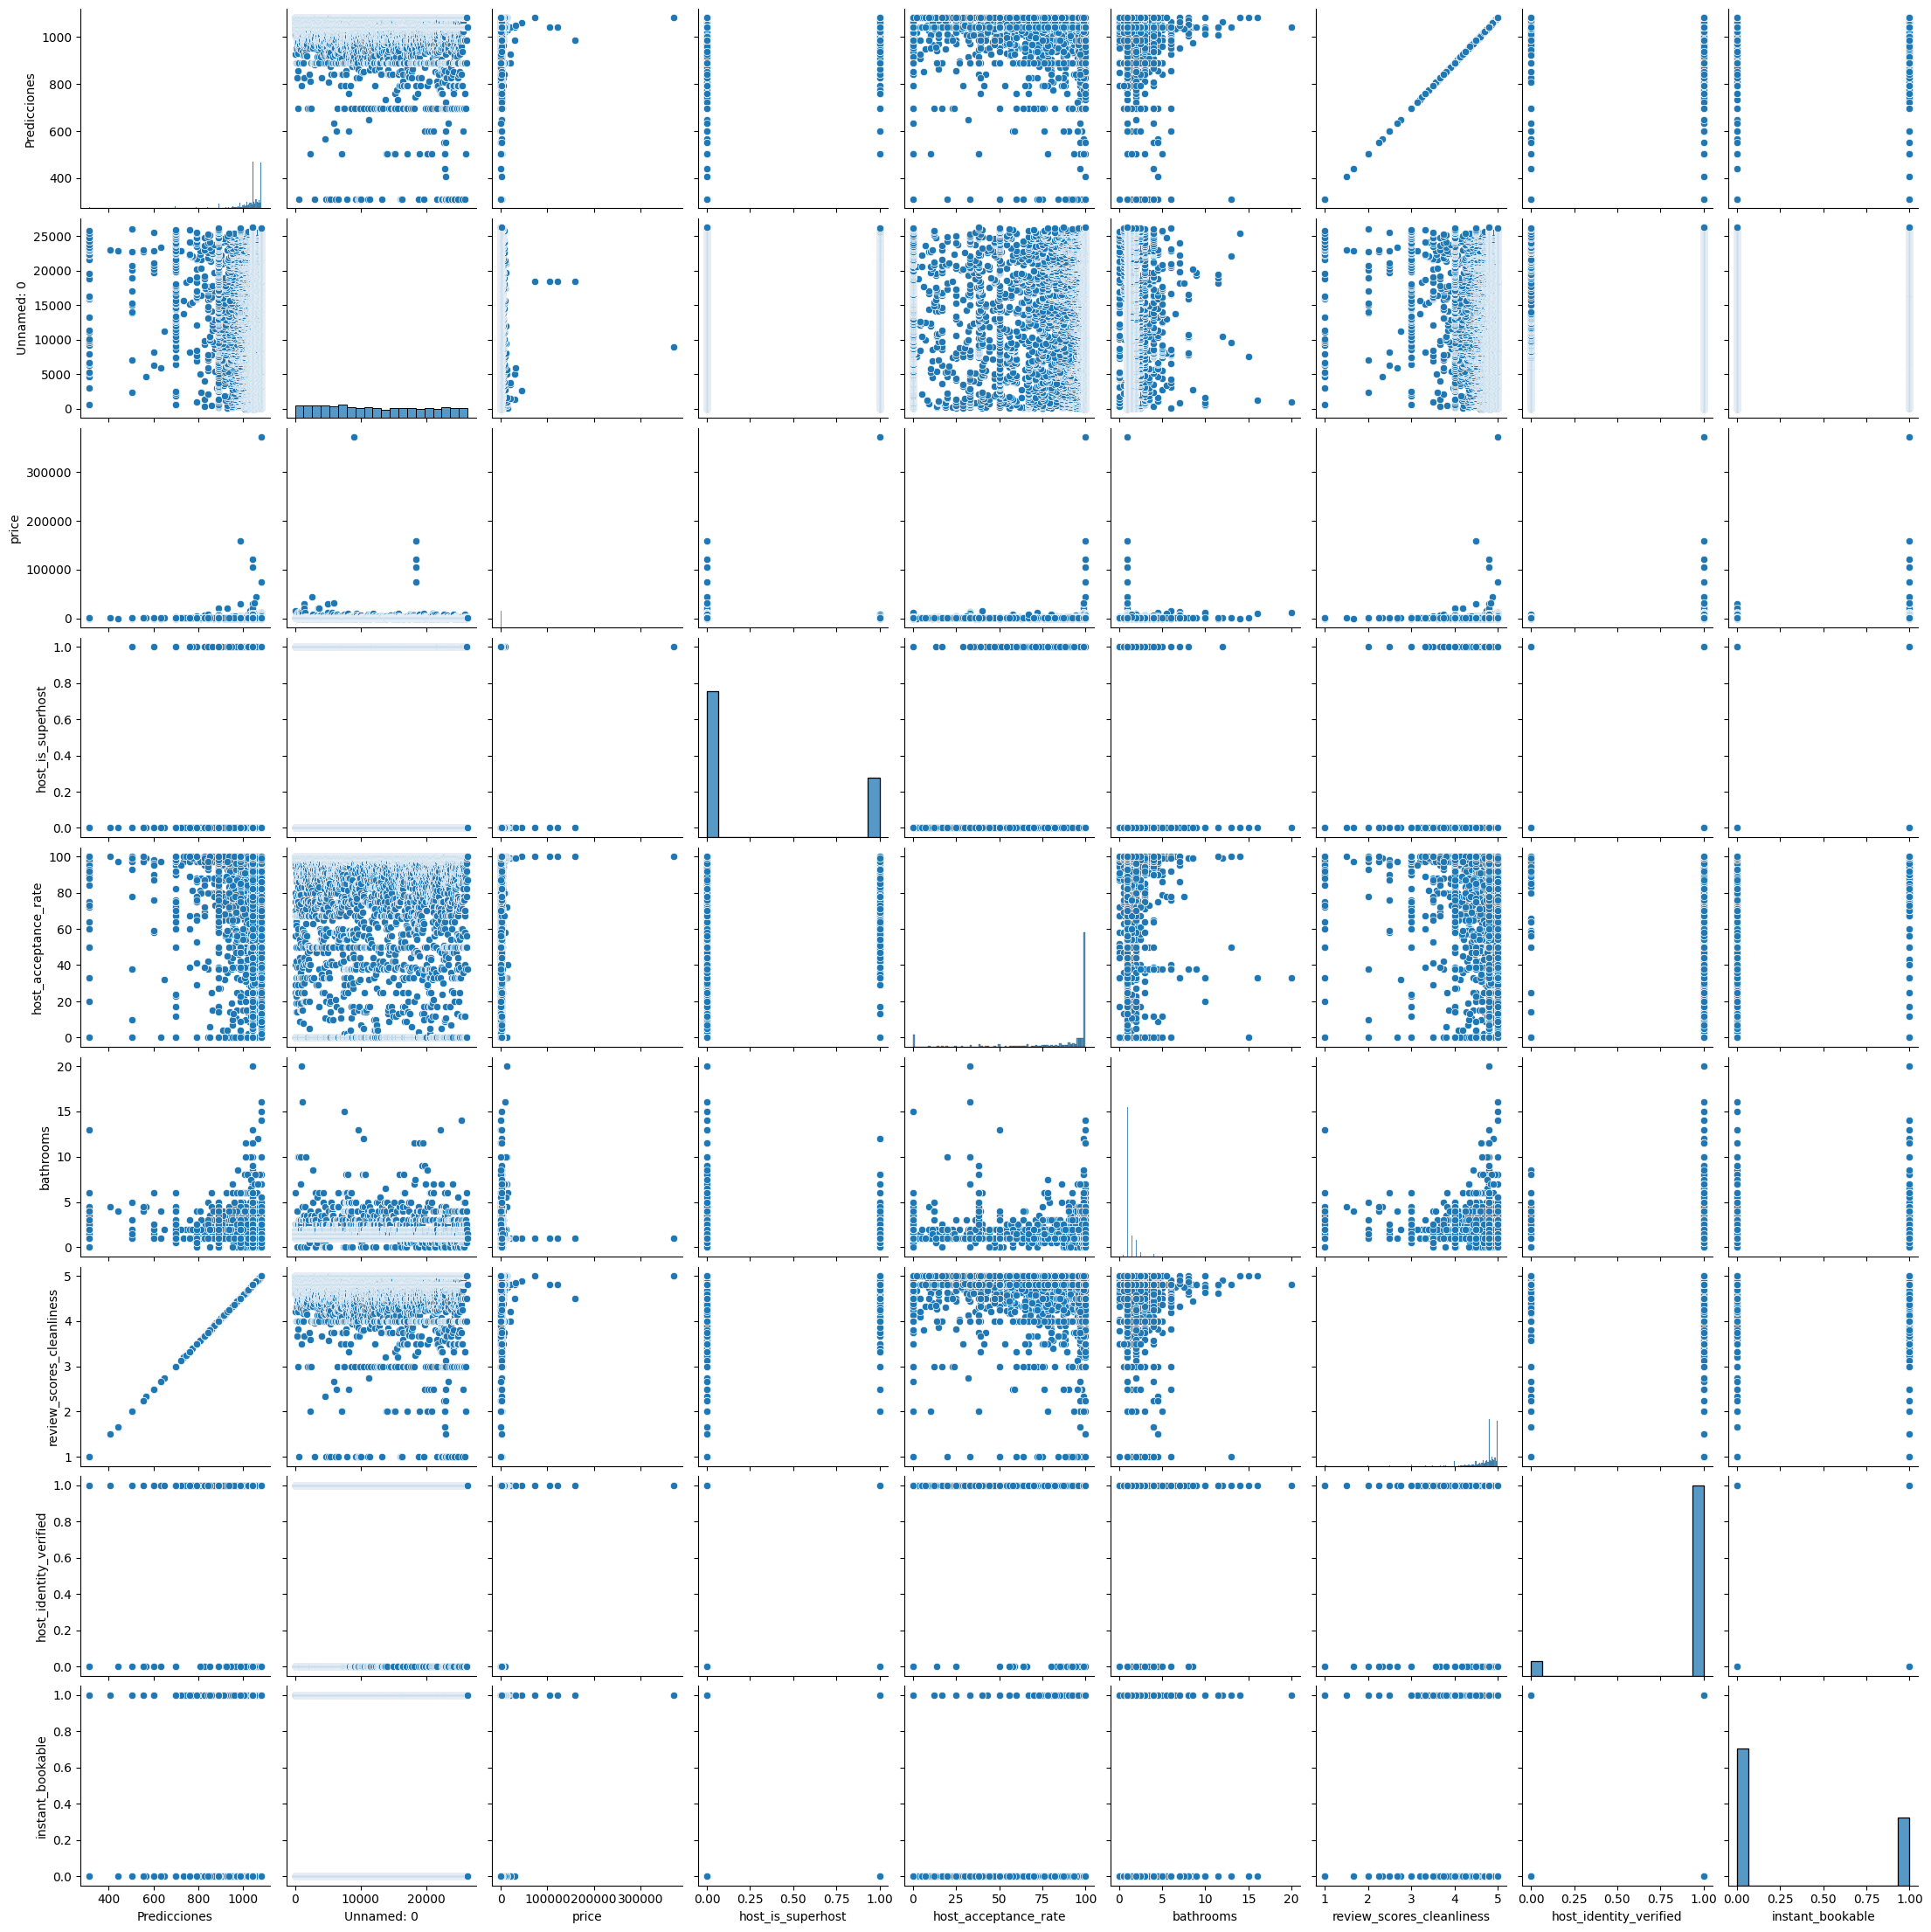

In [67]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data3)

In [68]:
#Correlaci9ones entre variables
Corr_Factors=data3.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000   -0.079163  0.016465   
Unnamed: 0                    -0.079163    1.000000 -0.004553   
price                          0.016465   -0.004553  1.000000   
host_is_superhost              0.168298    0.017666 -0.010176   
host_acceptance_rate           0.023832    0.017685  0.024610   
bathrooms                     -0.119123   -0.005837  0.010982   
review_scores_cleanliness      1.000000   -0.079163  0.016465   
host_identity_verified        -0.011849    0.192970 -0.002690   
instant_bookable              -0.074767    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.168298              0.023832  -0.119123   
Unnamed: 0                          0.017666              0.017685  -0.005837   
price                              -0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731  -0.080963   
host_acceptance_rate                0.215731              1.000000  -0.054411   
bathrooms                          -0.080963             -0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832  -0.119123   
host_identity_verified              0.160355             -0.110183  -0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                1.000000               -0.011849   
Unnamed: 0                                 -0.079163                0.192970   
price                                       0.016465               -0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832               -0.110183   
bathrooms                                  -0.119123               -0.046943   
review_scores_cleanliness                   1.000000               -0.011849   
host_identity_verified                     -0.011849                1.000000   
instant_bookable                           -0.074767                0.160096   

                           instant_bookable  
Predicciones                      -0.074767  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness         -0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

In [69]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.079163  0.016465   
Unnamed: 0                     0.079163    1.000000  0.004553   
price                          0.016465    0.004553  1.000000   
host_is_superhost              0.168298    0.017666  0.010176   
host_acceptance_rate           0.023832    0.017685  0.024610   
bathrooms                      0.119123    0.005837  0.010982   
review_scores_cleanliness      1.000000    0.079163  0.016465   
host_identity_verified         0.011849    0.192970  0.002690   
instant_bookable               0.074767    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.168298              0.023832   0.119123   
Unnamed: 0                          0.017666              0.017685   0.005837   
price                               0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731   0.080963   
host_acceptance_rate                0.215731              1.000000   0.054411   
bathrooms                           0.080963              0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832   0.119123   
host_identity_verified              0.160355              0.110183   0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                1.000000                0.011849   
Unnamed: 0                                  0.079163                0.192970   
price                                       0.016465                0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832                0.110183   
bathrooms                                   0.119123                0.046943   
review_scores_cleanliness                   1.000000                0.011849   
host_identity_verified                      0.011849                1.000000   
instant_bookable                            0.074767                0.160096   

                           instant_bookable  
Predicciones                       0.074767  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness          0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

<Axes: >

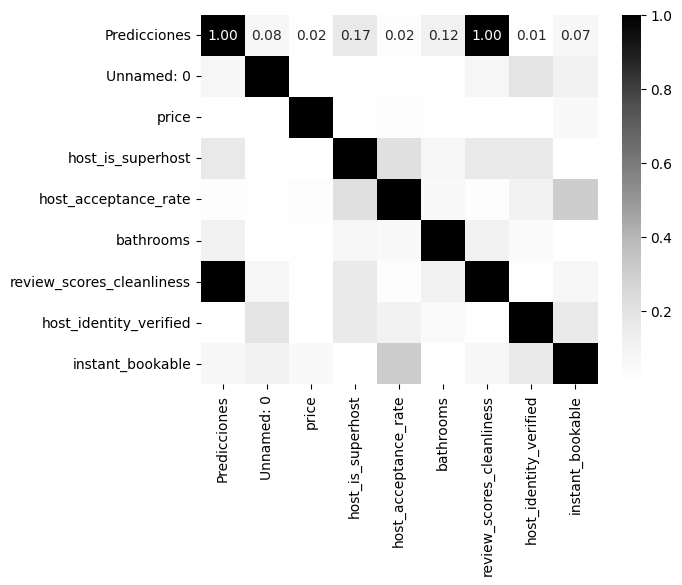

In [70]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs host_identity_verified**

<Axes: xlabel='host_identity_verified', ylabel='price'>

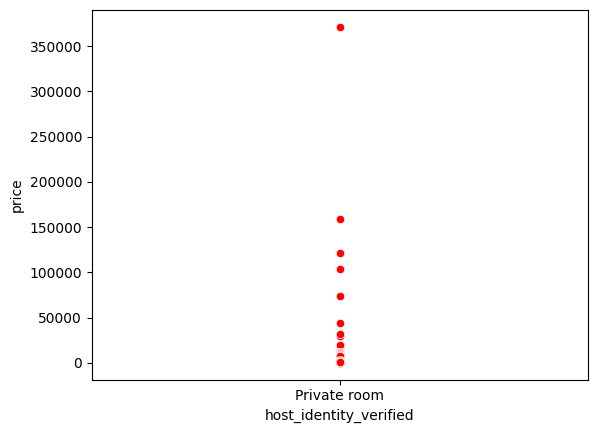

In [71]:
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=data_4)
sns.scatterplot(x='room_type', y='price', color='red', data=data_4)

In [72]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['host_identity_verified']]
Var_Dep = data_3['price']

In [73]:
model=LinearRegression()

In [74]:
type(model)

sklearn.linear_model._base.LinearRegression

In [75]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [76]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-50.98010552]),
 'rank_': 1,
 'singular_': array([23.96847517]),
 'intercept_': 1078.0161550888513}

**modelo matemático**

In [77]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

7.237780320412668e-06

In [78]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([1078.01615509, 1027.03604957, 1027.03604957, ..., 1027.03604957,
       1027.03604957, 1027.03604957])

In [79]:
#Se inserta la columna "Predicciones" al dataframe
data_4.insert(0, 'Predicciones',y_pred)
data_4

Predicciones  Unnamed: 0     room_type   price  host_is_superhost  \
0      1078.016155           4  Private room  1114.0                0.0   
1      1027.036050           6  Private room   340.0                1.0   
2      1027.036050          10  Private room   550.0                0.0   
3      1027.036050          12  Private room  1007.0                0.0   
4      1027.036050          13  Private room   310.0                0.0   
...            ...         ...           ...     ...                ...   
8603   1027.036050       26253  Private room   381.0                0.0   
8604   1027.036050       26266  Private room   264.0                0.0   
8605   1027.036050       26268  Private room   360.0                0.0   
8606   1027.036050       26272  Private room   943.0                0.0   
8607   1027.036050       26276  Private room   760.0                0.0   

      host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                     99.0        1.0                       4.80   
1                     75.0        1.0                       4.61   
2                    100.0        1.0                       4.60   
3                    100.0        1.0                       4.66   
4                     99.0        1.0                       4.79   
...                    ...        ...                        ...   
8603                  38.0        1.0                       4.80   
8604                 100.0        1.0                       4.80   
8605                  87.0        1.0                       4.80   
8606                 100.0        1.0                       4.80   
8607                 100.0        1.0                       4.80   

      host_identity_verified  instant_bookable                property_type  
0                        0.0               0.0                 Private room  
1                        1.0               0.0  Private room in rental unit  
2                        1.0               0.0  Private room in guest suite  
3                        1.0               0.0  Private room in rental unit  
4                        1.0               0.0  Private room in rental unit  
...                      ...               ...                          ...  
8603                     1.0               0.0   Private room in guesthouse  
8604                     1.0               1.0  Private room in rental unit  
8605                     1.0               0.0  Private room in rental unit  
8606                     1.0               1.0                Room in hotel  
8607                     1.0               1.0                Room in hotel  

[8608 rows x 11 columns]

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_identity_verified', ylabel='price'>

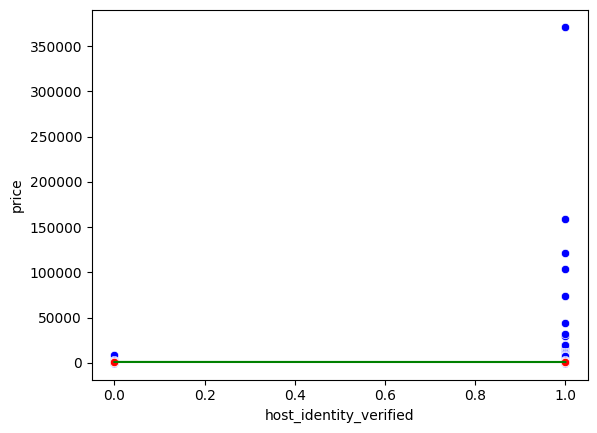

In [80]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=data_4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=data_4)
sns.lineplot(x='host_identity_verified', y='Predicciones', color="green", data=data_4)


In [81]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

7.237780320412668e-06

In [82]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0026903123090847034

In [83]:
#Eliminamos columna de tipo string
data4=data_4.drop(data.select_dtypes(include=['object']).columns, axis=1)


In [84]:
#Correlaci9ones entre variables
Corr_Factors=data4.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000   -0.192970  0.002690   
Unnamed: 0                    -0.192970    1.000000 -0.004553   
price                          0.002690   -0.004553  1.000000   
host_is_superhost             -0.160355    0.017666 -0.010176   
host_acceptance_rate           0.110183    0.017685  0.024610   
bathrooms                      0.046943   -0.005837  0.010982   
review_scores_cleanliness      0.011849   -0.079163  0.016465   
host_identity_verified        -1.000000    0.192970 -0.002690   
instant_bookable              -0.160096    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                       -0.160355              0.110183   0.046943   
Unnamed: 0                          0.017666              0.017685  -0.005837   
price                              -0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731  -0.080963   
host_acceptance_rate                0.215731              1.000000  -0.054411   
bathrooms                          -0.080963             -0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832  -0.119123   
host_identity_verified              0.160355             -0.110183  -0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.011849               -1.000000   
Unnamed: 0                                 -0.079163                0.192970   
price                                       0.016465               -0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832               -0.110183   
bathrooms                                  -0.119123               -0.046943   
review_scores_cleanliness                   1.000000               -0.011849   
host_identity_verified                     -0.011849                1.000000   
instant_bookable                           -0.074767                0.160096   

                           instant_bookable  
Predicciones                      -0.160096  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness         -0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

In [85]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.192970  0.002690   
Unnamed: 0                     0.192970    1.000000  0.004553   
price                          0.002690    0.004553  1.000000   
host_is_superhost              0.160355    0.017666  0.010176   
host_acceptance_rate           0.110183    0.017685  0.024610   
bathrooms                      0.046943    0.005837  0.010982   
review_scores_cleanliness      0.011849    0.079163  0.016465   
host_identity_verified         1.000000    0.192970  0.002690   
instant_bookable               0.160096    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.160355              0.110183   0.046943   
Unnamed: 0                          0.017666              0.017685   0.005837   
price                               0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731   0.080963   
host_acceptance_rate                0.215731              1.000000   0.054411   
bathrooms                           0.080963              0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832   0.119123   
host_identity_verified              0.160355              0.110183   0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.011849                1.000000   
Unnamed: 0                                  0.079163                0.192970   
price                                       0.016465                0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832                0.110183   
bathrooms                                   0.119123                0.046943   
review_scores_cleanliness                   1.000000                0.011849   
host_identity_verified                      0.011849                1.000000   
instant_bookable                            0.074767                0.160096   

                           instant_bookable  
Predicciones                       0.160096  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness          0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

<Axes: >

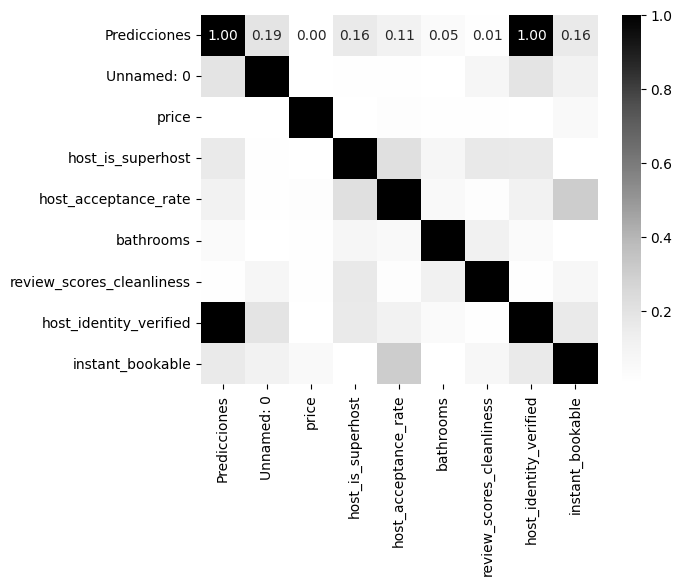

In [86]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='price'>

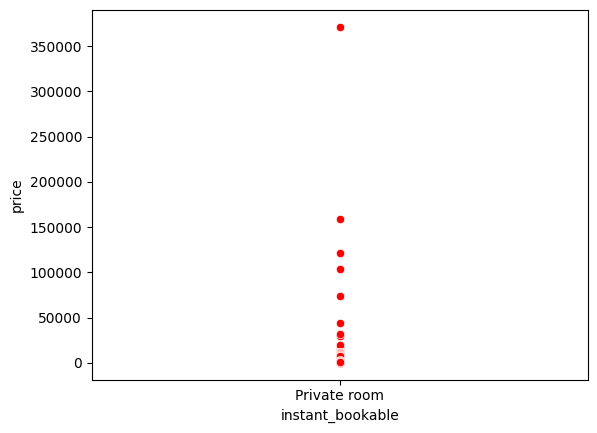

In [87]:
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=data_5)
sns.scatterplot(x='room_type', y='price', color='red', data=data_5)

In [88]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_5[['instant_bookable']]
Var_Dep = data_5['price']

In [89]:
model=LinearRegression()

type(model)

sklearn.linear_model._base.LinearRegression

In [90]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [91]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([568.67425343]),
 'rank_': 1,
 'singular_': array([43.63519856]),
 'intercept_': 842.8836079791864}

In [92]:
# **modelo matematico**
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0029848614063536782

In [93]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([ 842.88360798,  842.88360798,  842.88360798, ...,  842.88360798,
       1411.55786141, 1411.55786141])

In [94]:
#Se inserta la columna "Predicciones" al dataframe
data_5.insert(0, 'Predicciones',y_pred)
data_5

Predicciones  Unnamed: 0     room_type   price  host_is_superhost  \
0       842.883608           4  Private room  1114.0                0.0   
1       842.883608           6  Private room   340.0                1.0   
2       842.883608          10  Private room   550.0                0.0   
3       842.883608          12  Private room  1007.0                0.0   
4       842.883608          13  Private room   310.0                0.0   
...            ...         ...           ...     ...                ...   
8603    842.883608       26253  Private room   381.0                0.0   
8604   1411.557861       26266  Private room   264.0                0.0   
8605    842.883608       26268  Private room   360.0                0.0   
8606   1411.557861       26272  Private room   943.0                0.0   
8607   1411.557861       26276  Private room   760.0                0.0   

      host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                     99.0        1.0                       4.80   
1                     75.0        1.0                       4.61   
2                    100.0        1.0                       4.60   
3                    100.0        1.0                       4.66   
4                     99.0        1.0                       4.79   
...                    ...        ...                        ...   
8603                  38.0        1.0                       4.80   
8604                 100.0        1.0                       4.80   
8605                  87.0        1.0                       4.80   
8606                 100.0        1.0                       4.80   
8607                 100.0        1.0                       4.80   

      host_identity_verified  instant_bookable                property_type  
0                        0.0               0.0                 Private room  
1                        1.0               0.0  Private room in rental unit  
2                        1.0               0.0  Private room in guest suite  
3                        1.0               0.0  Private room in rental unit  
4                        1.0               0.0  Private room in rental unit  
...                      ...               ...                          ...  
8603                     1.0               0.0   Private room in guesthouse  
8604                     1.0               1.0  Private room in rental unit  
8605                     1.0               0.0  Private room in rental unit  
8606                     1.0               1.0                Room in hotel  
8607                     1.0               1.0                Room in hotel  

[8608 rows x 11 columns]

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='instant_bookable', ylabel='price'>

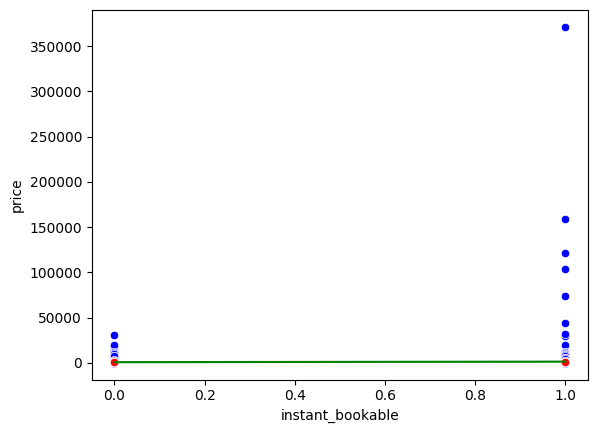

In [95]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=data_5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=data_5)
sns.lineplot(x='instant_bookable', y='Predicciones', color="green", data=data_5)

In [96]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0029848614063536782

In [97]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.054633885147897715

In [98]:
#Eliminamos columna de tipo string
data5=data_5.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

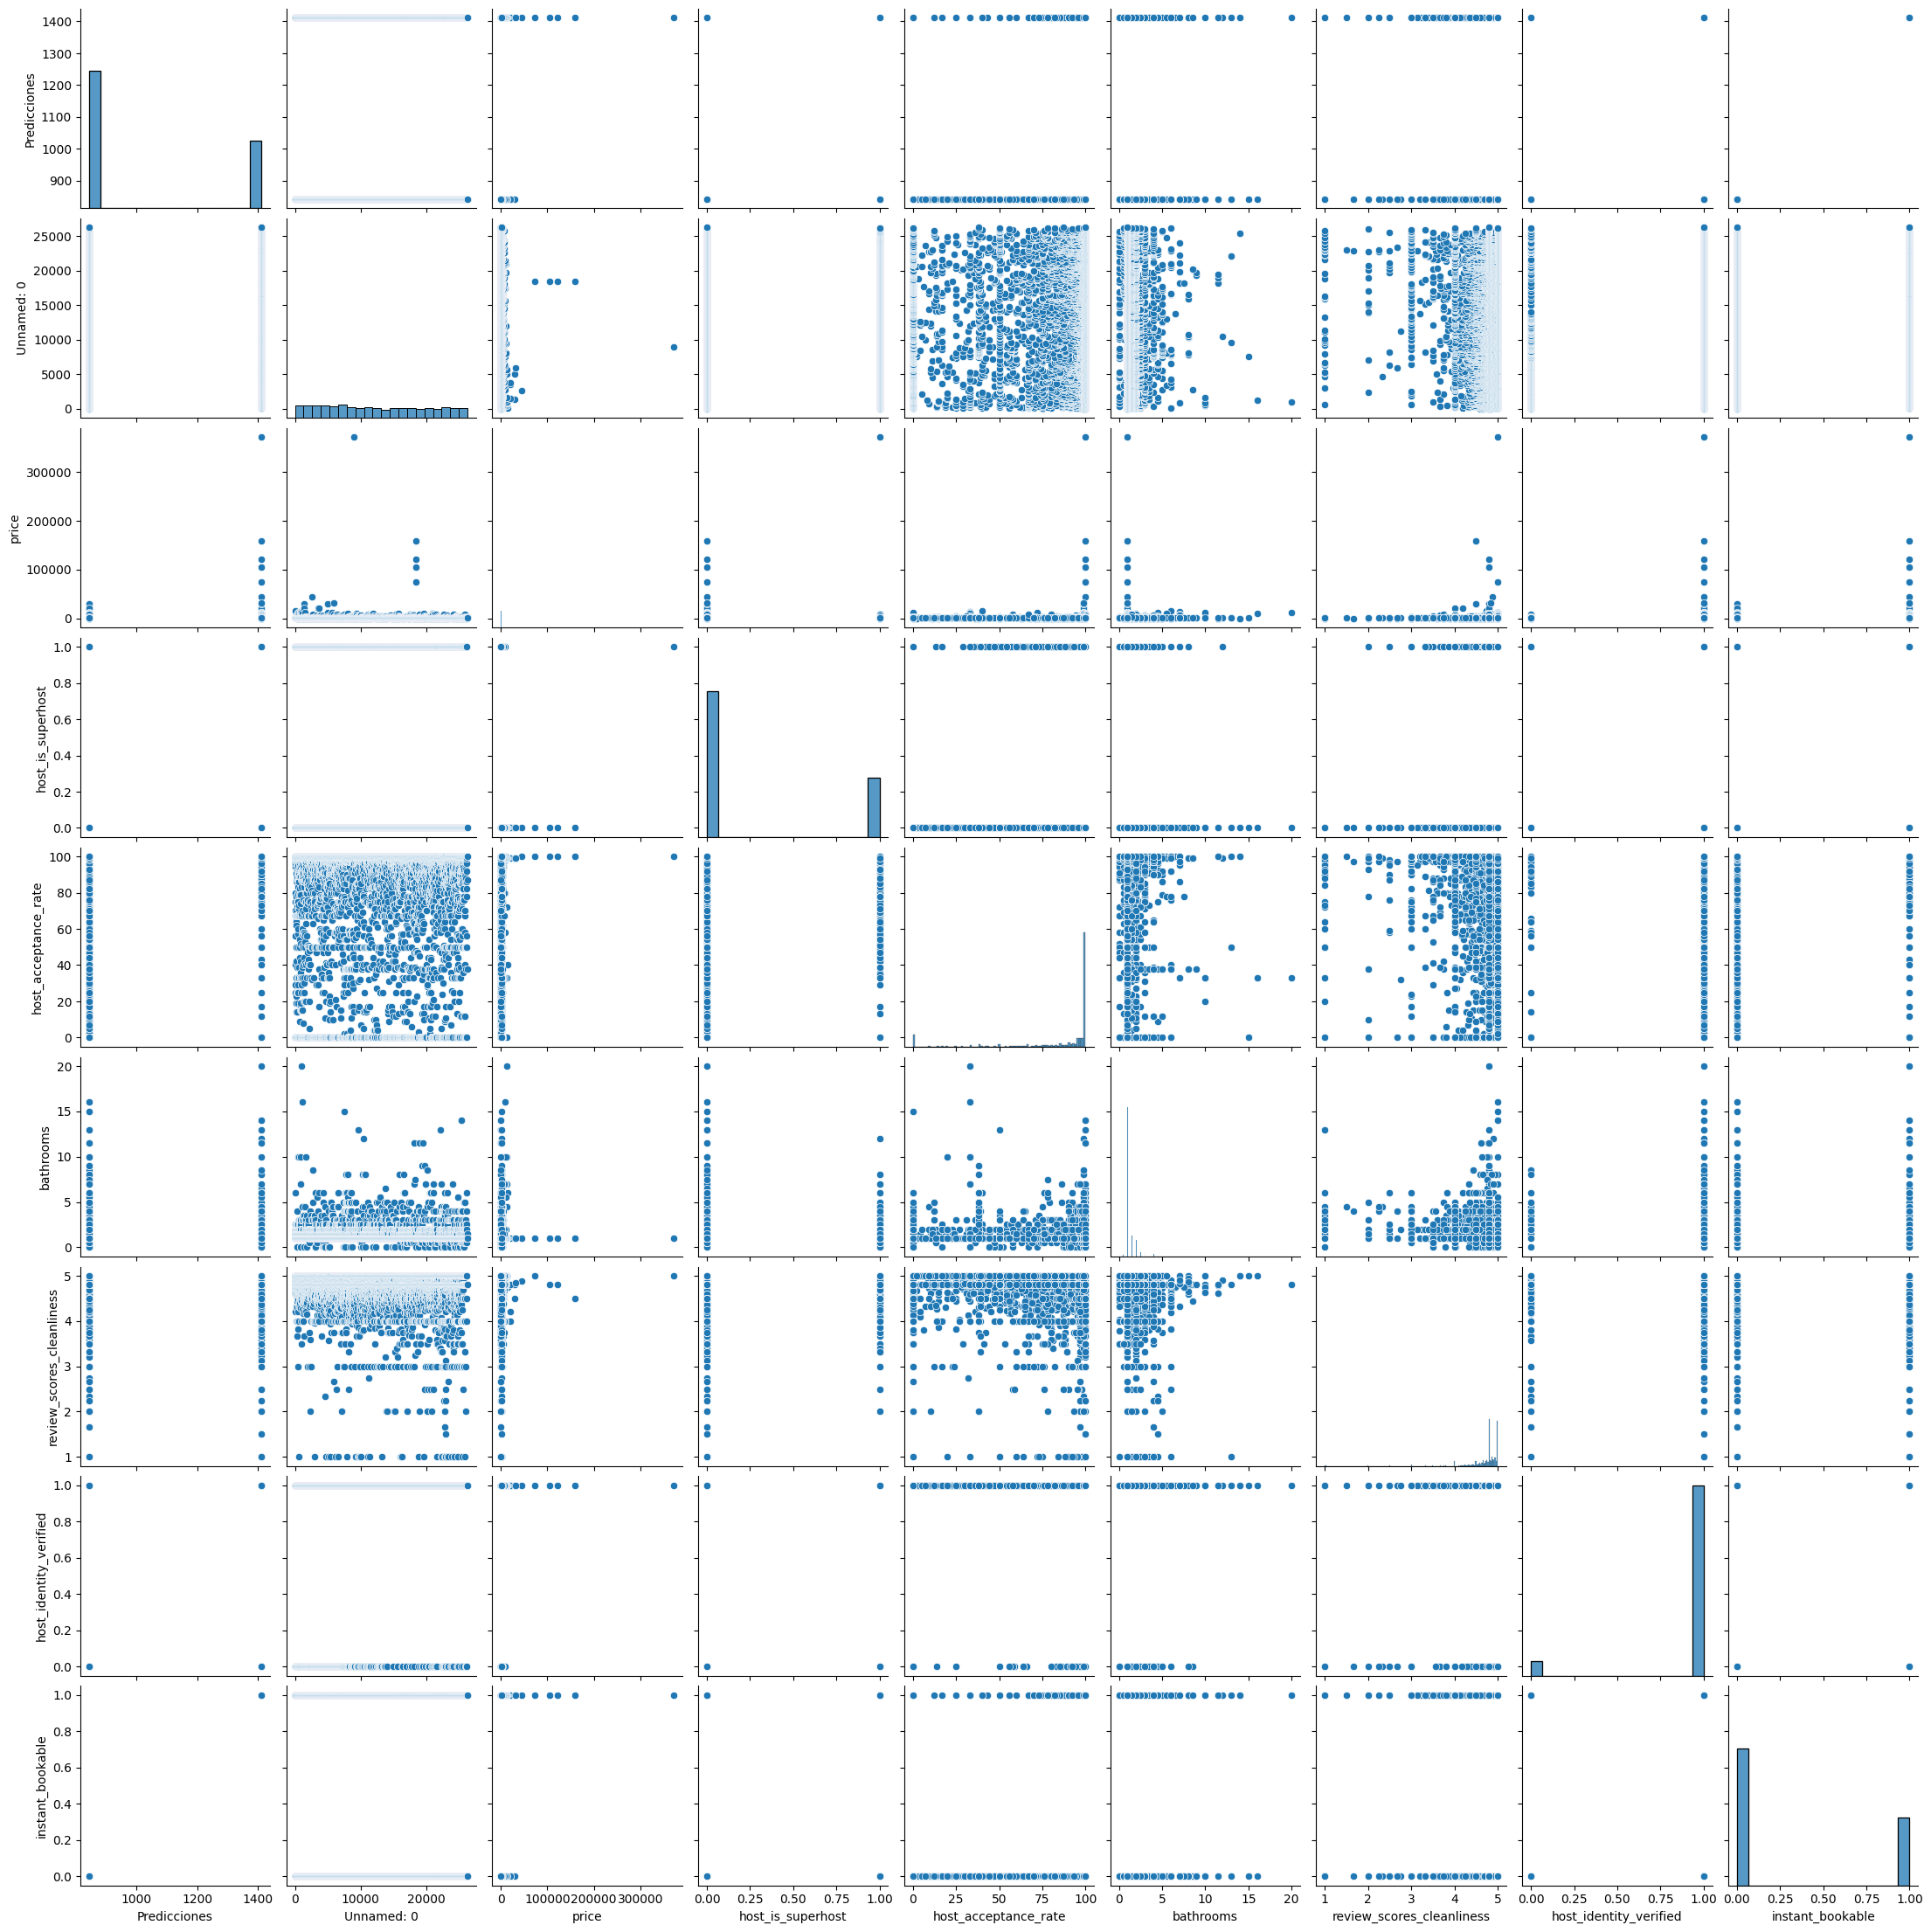

In [99]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data5)

In [100]:
#Correlaci9ones entre variables
Corr_Factors=data5.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.108521  0.054634   
Unnamed: 0                     0.108521    1.000000 -0.004553   
price                          0.054634   -0.004553  1.000000   
host_is_superhost              0.004868    0.017666 -0.010176   
host_acceptance_rate           0.305275    0.017685  0.024610   
bathrooms                      0.003016   -0.005837  0.010982   
review_scores_cleanliness     -0.074767   -0.079163  0.016465   
host_identity_verified         0.160096    0.192970 -0.002690   
instant_bookable               1.000000    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.004868              0.305275   0.003016   
Unnamed: 0                          0.017666              0.017685  -0.005837   
price                              -0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731  -0.080963   
host_acceptance_rate                0.215731              1.000000  -0.054411   
bathrooms                          -0.080963             -0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832  -0.119123   
host_identity_verified              0.160355             -0.110183  -0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                               -0.074767                0.160096   
Unnamed: 0                                 -0.079163                0.192970   
price                                       0.016465               -0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832               -0.110183   
bathrooms                                  -0.119123               -0.046943   
review_scores_cleanliness                   1.000000               -0.011849   
host_identity_verified                     -0.011849                1.000000   
instant_bookable                           -0.074767                0.160096   

                           instant_bookable  
Predicciones                       1.000000  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness         -0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

In [101]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1


Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.108521  0.054634   
Unnamed: 0                     0.108521    1.000000  0.004553   
price                          0.054634    0.004553  1.000000   
host_is_superhost              0.004868    0.017666  0.010176   
host_acceptance_rate           0.305275    0.017685  0.024610   
bathrooms                      0.003016    0.005837  0.010982   
review_scores_cleanliness      0.074767    0.079163  0.016465   
host_identity_verified         0.160096    0.192970  0.002690   
instant_bookable               1.000000    0.108521  0.054634   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.004868              0.305275   0.003016   
Unnamed: 0                          0.017666              0.017685   0.005837   
price                               0.010176              0.024610   0.010982   
host_is_superhost                   1.000000              0.215731   0.080963   
host_acceptance_rate                0.215731              1.000000   0.054411   
bathrooms                           0.080963              0.054411   1.000000   
review_scores_cleanliness           0.168298              0.023832   0.119123   
host_identity_verified              0.160355              0.110183   0.046943   
instant_bookable                    0.004868              0.305275   0.003016   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.074767                0.160096   
Unnamed: 0                                  0.079163                0.192970   
price                                       0.016465                0.002690   
host_is_superhost                           0.168298                0.160355   
host_acceptance_rate                        0.023832                0.110183   
bathrooms                                   0.119123                0.046943   
review_scores_cleanliness                   1.000000                0.011849   
host_identity_verified                      0.011849                1.000000   
instant_bookable                            0.074767                0.160096   

                           instant_bookable  
Predicciones                       1.000000  
Unnamed: 0                         0.108521  
price                              0.054634  
host_is_superhost                  0.004868  
host_acceptance_rate               0.305275  
bathrooms                          0.003016  
review_scores_cleanliness          0.074767  
host_identity_verified             0.160096  
instant_bookable                   1.000000

<Axes: >

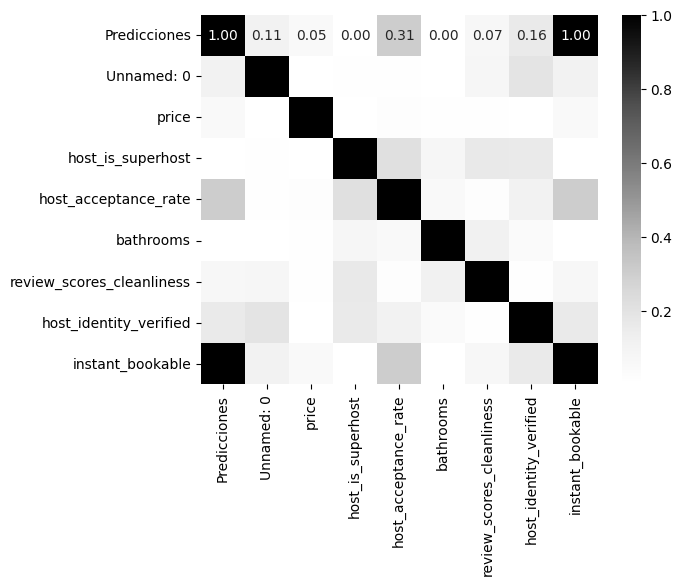

In [102]:

#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs property_type**